In [3]:
import sys; sys.path.append('../..')
from abslithist import *

In [4]:
C = lltk.load('CanonFiction')

In [5]:
df = pd.read_pickle(C.au.Richardson.Pamela1741.path_pos).assign(title='Pamela1741')
# df2 = pd.read_pickle(C.au.Richardson)
# df2

In [6]:
df[df.upos=='VERB'].iloc[0]

def to_tenseint(tense):
    if tense=='Pres': return 1
    if tense=='Past': return -1
    return np.nan

df['TenseInt']=df.Tense.apply(to_tenseint)
df.TenseInt

para_i  sent_i  word_i
1       1       1         NaN
                2         NaN
                3         NaN
                4         NaN
                5         NaN
                         ... 
6103    3       29        NaN
                30        NaN
                31        NaN
                32       -1.0
                33        NaN
Name: TenseInt, Length: 594230, dtype: float64

In [8]:
figdf = df[df.Tense!='']
figdf = figdf.assign(y=figdf.TenseInt.rolling(100).mean(), x=list(range(len(figdf))))
figdf = figdf[figdf.x.apply(lambda _x: not _x% 100)]
figdf[['text','xpos','Tense','TenseInt','x','y']]

,,,text,xpos,Tense,TenseInt,x,y
para_i,sent_i,word_i,,,,,,
1,1,7,have,VBP,Pres,1.0,0,NaN
5,16,13,been,VBN,Past,-1.0,100,-0.26
14,2,10,overflowing,VBG,Pres,1.0,200,0.26
22,4,20,think,VBP,Pres,1.0,300,0.18
29,3,3,hope,VBP,Pres,1.0,400,0.16
...,...,...,...,...,...,...,...,...
6061,1,13,had,VBD,Past,-1.0,55300,-0.42
6068,4,74,had,VBD,Past,-1.0,55400,-0.66
6074,3,82,call,VBP,Pres,1.0,55500,-0.46


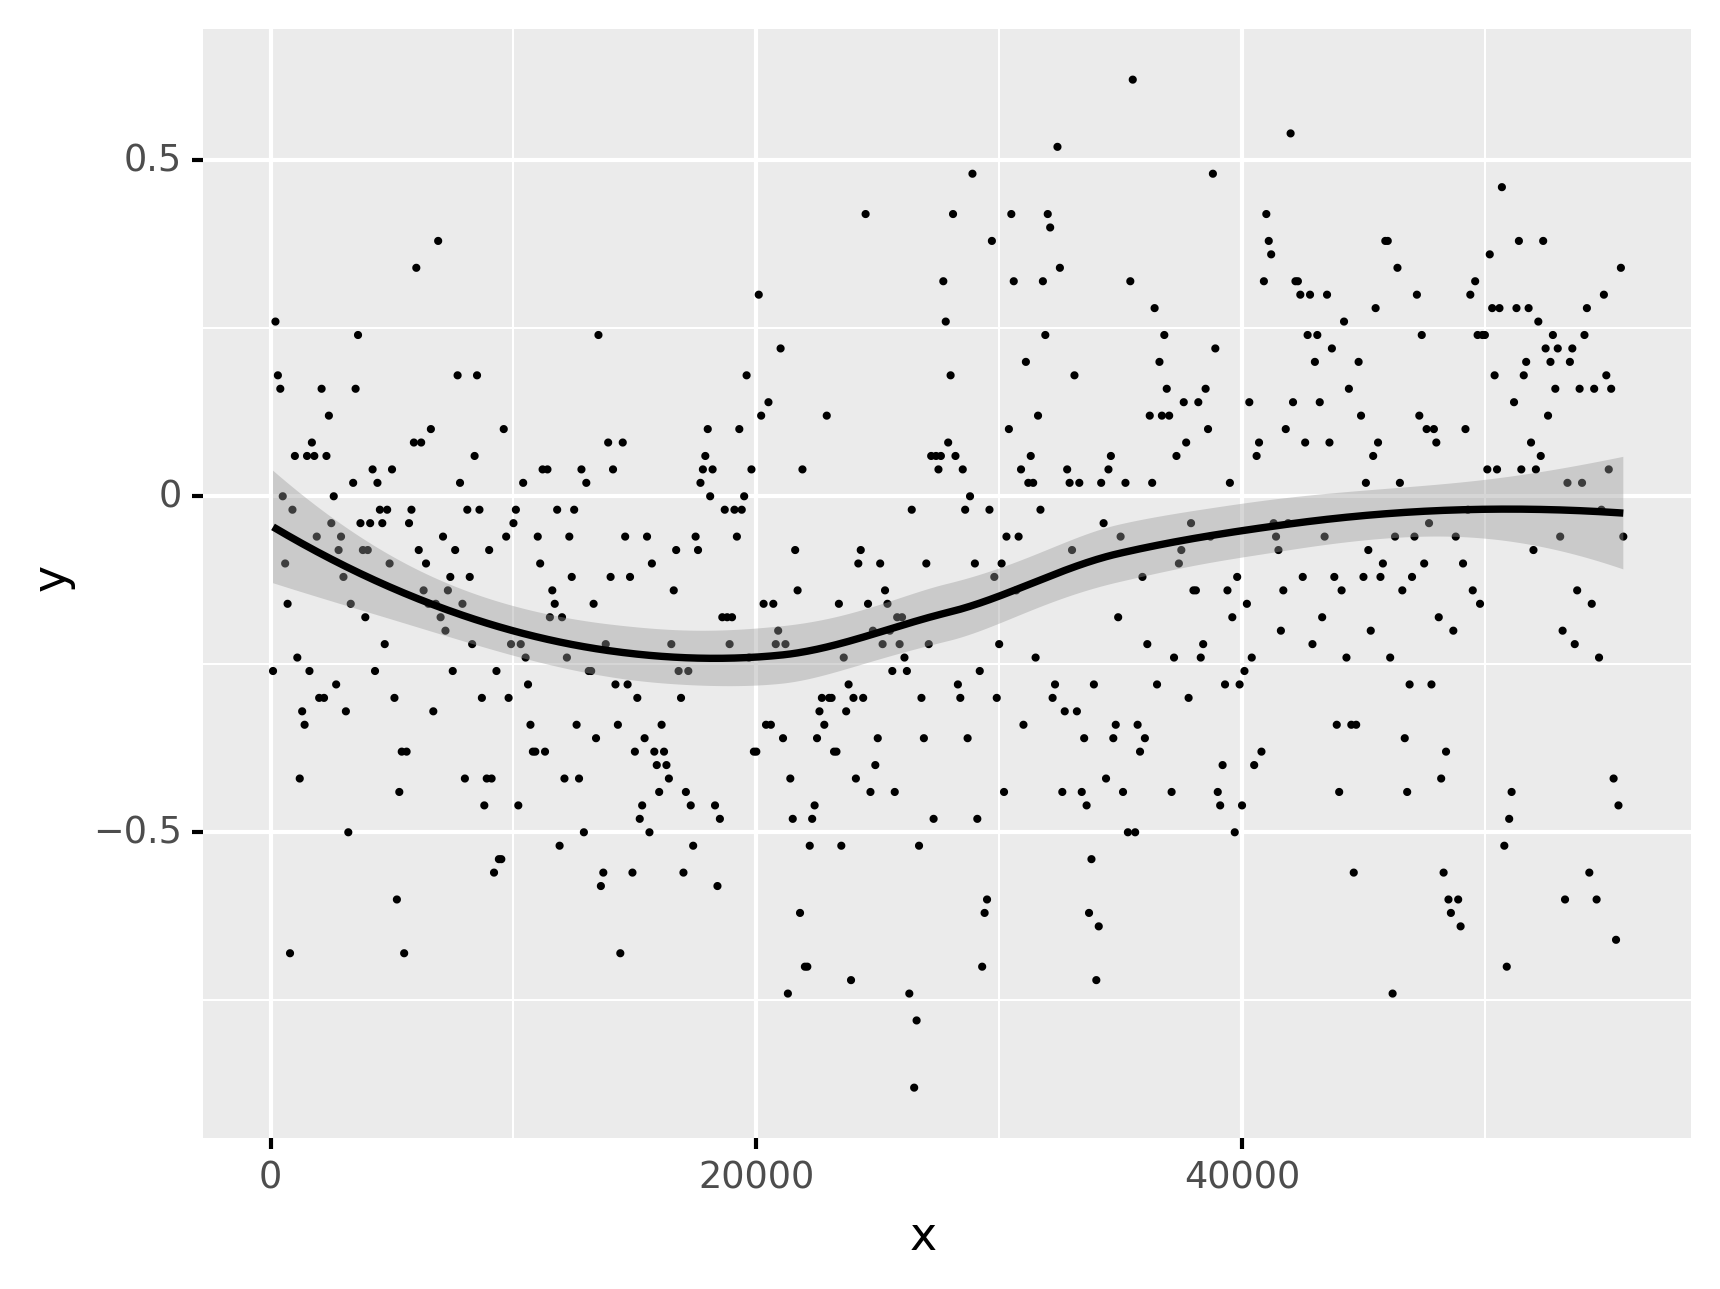

<ggplot: (744288500)>

In [10]:
fig=p9.ggplot(figdf, p9.aes(x='x',y='y')) + p9.geom_point(size=.1) + p9.geom_smooth()
fig

In [45]:
# !pip install scikit-misc

In [ ]:
!p

In [8]:
get_vecnorms()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/ryan/github/abslithist/data/fields/data.wordnorms_vec.csv'